# Part $\mathcal{II}$ : [20%] - 2.1. k-Nearest Neighbors

## 2.1.1: Question 6

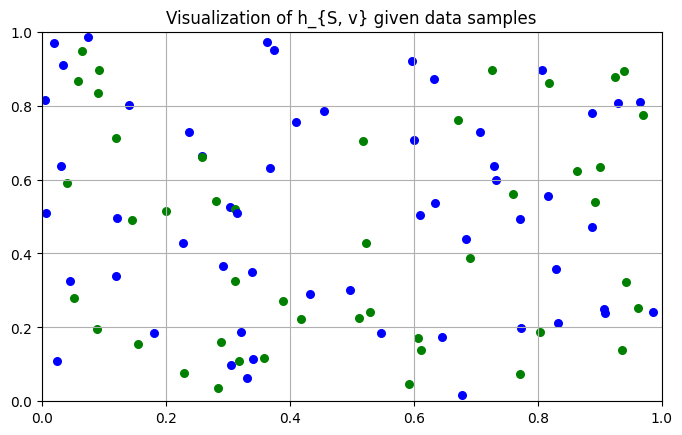

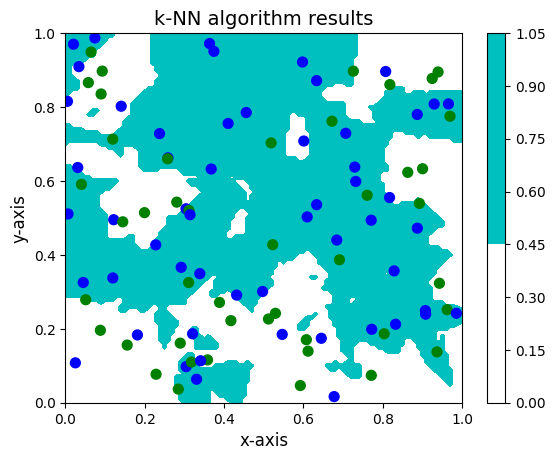

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
np.random.seed(42)

def gen_h(n_samples: int = 100):
    """ 
    Generating the random centers uniformly and their corresponding labels.

    Parameters
    ----------
    n_samples : int
        Number of centers to generate
    Returns
    -------
    x_i : np.ndarray
        Centers x and y coordinates. Array of shape (n_samples, 2), each column is the x and y coordinate respectively
    y_i : np.ndarray
        Labels sampled for each of the centers. Shape: (n_sample,)
    """

    x_i = np.random.uniform(0, 1, (n_samples, 2))
    y_i = np.random.choice([0, 1], size=n_samples)

    return x_i, y_i

def visualization(x_i, y_i):
    """ 
    Plotting the centers sampled from the process p_H

    Parameters
    ----------
    x_i : np.ndarray
        Centers x and y coordinates. Array of shape (n_samples, 2), each column is the x and y coordinate respectively
    y_i : np.ndarray
        Labels sampled for each of the centers. Shape: (n_sample,)
    Returns
    -------

    """

    plt.figure(figsize=(8, 4.8))
    for i in range(len(y_i)):
        if y_i[i] == 0:
            plt.scatter(x_i[i, 0], x_i[i, 1], color="green", s=30)
        else:
            plt.scatter(x_i[i, 0], x_i[i, 1], color="blue", s=30)
    plt.title("Visualization of h_{S, v} given data samples")
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.grid()
    plt.show


def euclidean_distance(grid_points, centers):
    """ 
    Calculates the euclidean distance between the grid points and a given center

    Parameters
    ----------
    grid_points : np.ndarray
        Meshgrid containing all the points (x,y) in [0, 1]^2
    centers : np.ndarray
        Array containing the center's x and y coordinates

    Returns
    -------
    distance : np.ndarray
        Returns the distance of each point to the given center
    """

    reshaped_grid_points = grid_points[:, np.newaxis, :]
    reshaped_centers = centers[np.newaxis, :, :]
    differences = reshaped_grid_points - reshaped_centers
    distance = np.sqrt(np.sum(np.square(differences), axis=2))

    return distance


def k_nn_algorithm(gridpoints, x_center, y_center, v: int = 3):
    """
    kNN algorithm performed for given x,y coordinates of center and corresponding labels on given meshgrid.

    Parameters
    ----------
    gridpoints : np.ndarray
        Array containing all the values of the points on the meshgrid
    x_center : np.ndarray
        Array containing all the x,y coordinates of the centers
    y_center : np.ndarray
        Array containing the labels of the centers

    Returns
    -------
    labels : list
        List of the labels of each point for the flattened meshgrid
    """

    # Calculating the euclidean distance from gridpoints to centers
    distance = euclidean_distance(gridpoints, x_center)

    # Finding the closest three centers (or v) to a given point, and getting their labels from y_center
    smallest_distance_indexes = np.argsort(distance, axis=1)[:,:v]
    labels_kNN = y_center[smallest_distance_indexes]

    # Summing all the labels for the three closest centers
    labels_sum = np.sum(labels_kNN, axis=1)
    
    labels = []

    # Looping over each element in label sum
    for element in labels_sum:

        # If the labels of the three closest elements sum to over v/2, we assign a 1
        if element > v/2:
            labels.append(1)
        # If the labels of the three closest elements sum to under v/2, we assign a 0
        elif element < v/2:
            labels.append(0)
        # If the labels of the three closest elements sum to v/2, we assign randomly 0 or 1
        else:
            value = int(np.random.choice([0, 1,], p=[0.5, 0.5]))
            labels.append(value)

    return labels

def plot_knn(x_grid, y_grid, x_center, y_center, predicted_labels, save_fig=False, 
             grid_colors = ListedColormap(['white', 'c']), centers_colors=ListedColormap(['green', 'blue'])):
    """
    Plotting the kNN algorithm results obtained

    Parameters
    ----------
    x_grid :
    y_grid :
    x_center :
    y_center :
    predicted_labels : 

    Returns
    -------

    """

    plt.figure()
    plt.contourf(x_grid, y_grid, predicted_labels, cmap=grid_colors)
    plt.colorbar()
    plt.scatter(x_center[:, 0], x_center[:, 1], c=y_center, cmap =centers_colors, marker='o', s=50)
    plt.title('k-NN algorithm results', fontsize = 14)
    plt.xlabel('x-axis', fontsize = 12)
    plt.ylabel('y-axis', fontsize = 12)
    if save_fig:
        plt.savefig('kNN.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()
    

def execute_knn():

    # Generate the centers
    x_center, y_center = gen_h()

    # Visualize them
    visualization(x_center,y_center)

    # Creating the grid
    n_grid = 100
    x_grid, y_grid = np.meshgrid((1/100)*np.floor(np.linspace(0, 100, n_grid)), (1/100)*np.floor(np.linspace(0,100,n_grid)))
    
    xy_grid = np.stack([x_grid.flatten(), y_grid.flatten()], axis=1)
    
    # Predicting the label of each grid point
    predicted_labels = np.array(k_nn_algorithm(xy_grid, x_center, y_center, 3))
    predicted_labels = np.reshape(predicted_labels, (100, 100))
    
    # Plotting the results
    plot_knn(x_grid, y_grid, x_center, y_center, predicted_labels)
    

# Running the main function to obtain the results
execute_knn()

## 2.1.2: Question 7

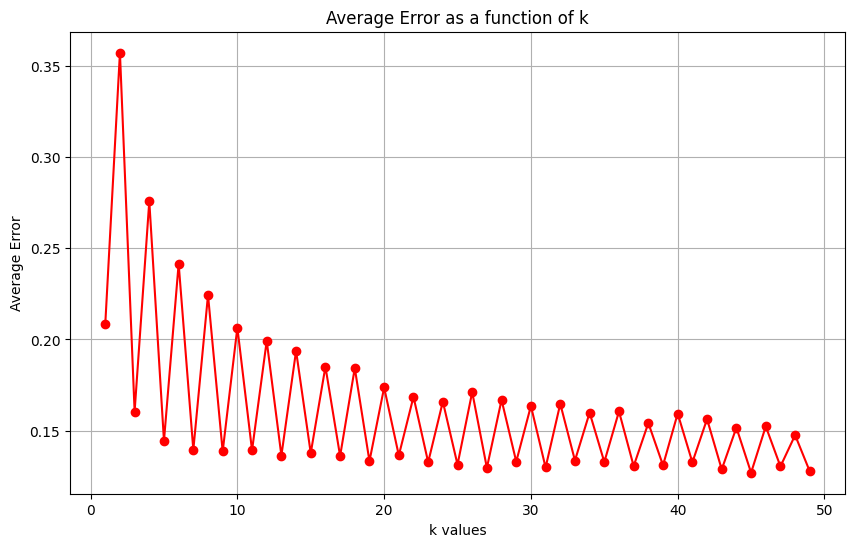

In [ ]:
def gen_training(n_data, x, centers, label_centers, k=3):
    """ 
    Generating the labels for training data for the protocol A.

    Parameters
    ----------
    n_data : int
        Number of training data points to sample
    x : np.ndarray
        Shape (n_data,2). Contains the random data points used for training
    centers : 
    label_centers :
    k : number of Nearest Neighbors we use for the algorithm

    Returns
    -------
    labels : np.ndarray
        Shape (ndata,), contains the labels of the training data generated randomly
    """

    labels = np.zeros(n_data)

    for i in range(n_data):
        
        # Coin flip process as described in protocol
        coin_flip = np.random.random() < 0.2

        if coin_flip:
            current_label = np.random.choice([0, 1], 1)
        else:
            current_label = k_nn_algorithm(x[i][np.newaxis, :], centers, label_centers, k)
        
        # Updating the label value with the chosen label
        labels[i] = current_label[0]

    return labels


def error_knn():
    """
    Supposed to be the function to calculate the error of the kNN algorithm, 
    but could not make it work. See the handed out paper.
    """

    error_list = []
    k_set = np.arange(1, 50)

    for k_i in k_set:
        error_sum = 0

        for _ in range(100):

            iter_centers, iter_labels = gen_h()

            num_training = 4000
            data_train = np.random.uniform(0, 1, (num_training, 2))
            label_train = gen_training(num_training, data_train, iter_centers, iter_labels, k=k_i)

            num_test = 1000
            data_test = np.random.uniform(0, 1, (num_test, 2))
            label_test = gen_training(num_test, data_test, iter_centers, iter_labels, k=k_i)

            predicted_labels = np.array(k_nn_algorithm(data_test, data_train, label_train, k_i))

            current_error = (num_test - np.sum(predicted_labels == label_test))/num_test
            error_sum += current_error

        average_error = error_sum/100
        error_list.append(average_error)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_set, error_list, marker='o', linestyle='-', color='red', )
    plt.title("Average Error as a function of k")
    plt.xlabel("k values")
    plt.ylabel("Average Error")
    plt.grid()
    #plt.savefig("error_k.png", format='png', dpi=300, bbox_inches='tight')
    plt.show()

error_knn()
